## Midterm Project

## Classification Analysis

## Author: Mahesh Bashyal

## Date: November 11, 2025

## Objective: To learn how to apply different classification models used in machine learning

## Introduction

## We will use the Banknote Authentication dataset to build and evaluate different classification models in order to determine if the banknote is authentic or not.

## Imports

In [53]:
# Import pandas for data manipulation and analysis (we might want to do more with it)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 

## Section 1. Import and Inspect the data

### 1.1 Load the dataset and display first 10 rows

In [54]:
# Load the data
import pandas as pd

df = pd.read_csv("banknote.txt", header=None, sep=",")

df.columns = ["variance", "skewness", "curtosis", "entropy", "class"]

print(df.head(10))

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661  -2.80730 -0.44699      0
1   4.54590    8.1674  -2.45860 -1.46210      0
2   3.86600   -2.6383   1.92420  0.10645      0
3   3.45660    9.5228  -4.01120 -3.59440      0
4   0.32924   -4.4552   4.57180 -0.98880      0
5   4.36840    9.6718  -3.96060 -3.16250      0
6   3.59120    3.0129   0.72888  0.56421      0
7   2.09220   -6.8100   8.46360 -0.60216      0
8   3.20320    5.7588  -0.75345 -0.61251      0
9   1.53560    9.1772  -2.27180 -0.73535      0


## 1.2 Checking for missing values and display summary statistics

In [55]:
# Checking for missing values
df.isnull().values.any()


np.False_

In [56]:
# Display summary statistics
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Reflection 1

#### What do you notice about the dataset?
#### The dataset seems to have high standard deviation relative to its mean indicating high variance. The mean here is 0.43 while the standard deviation is 2.842

#### Are there any data issues? As of now, I don't see data issues. I also don't see missing values which is good. 




## Section 2 - Data Exploration and Preparation

## 2.1 Explore data patterns and distributions

Create histogram, scatter plots and countplots

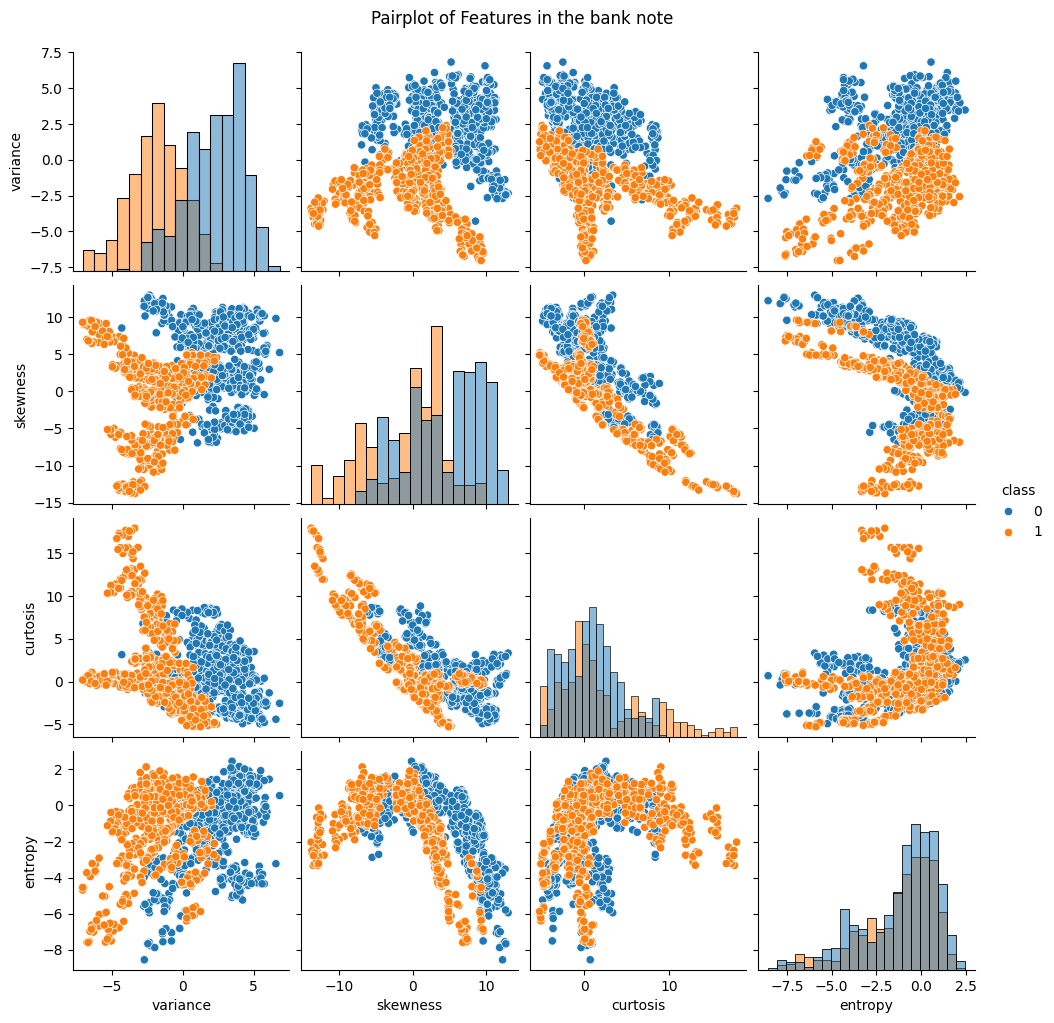

In [57]:
# Scatterplot - use to compare relationships and see which combination helps us to differentiate between real notes and forged notes
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue="class", diag_kind="hist")
plt.suptitle("Pairplot of Features in the bank note", y=1.02)
plt.show()

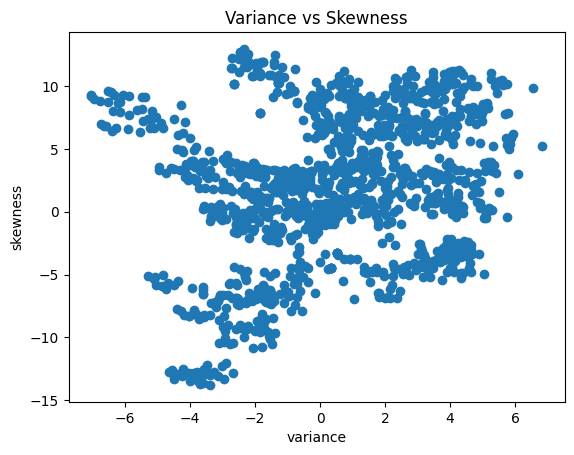

In [58]:
# Create a scatter plot of variance vs skewness
import matplotlib.pyplot as plt
plt.scatter(df['variance'], df['skewness'])
plt.xlabel('variance')
plt.ylabel('skewness')
plt.title('Variance vs Skewness')
plt.show()


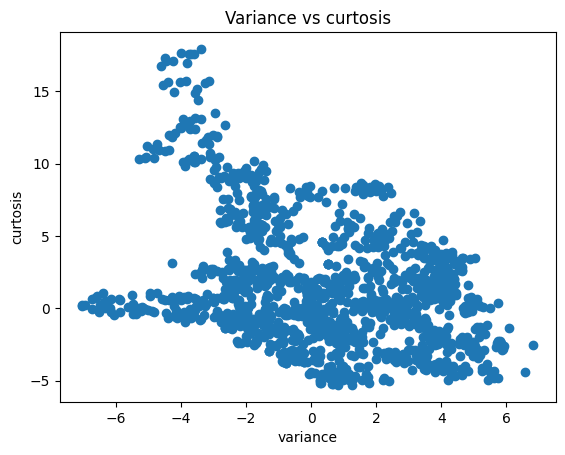

In [59]:
# Create a scatter plot of variance vs curtosis
import matplotlib.pyplot as plt
plt.scatter(df['variance'], df['curtosis'])
plt.xlabel('variance')
plt.ylabel('curtosis')
plt.title('Variance vs curtosis')
plt.show()


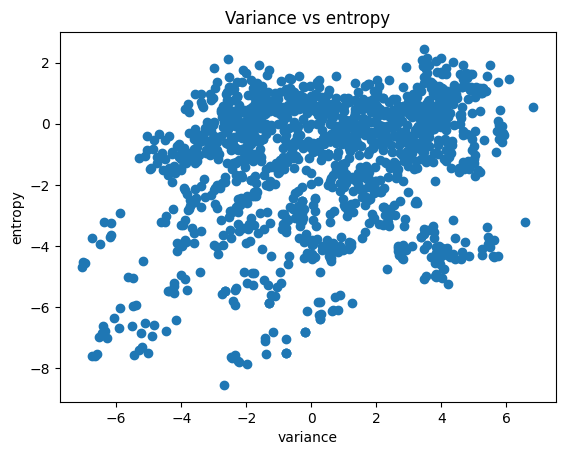

In [60]:
# Create a scatter plot of variance vs entropy
import matplotlib.pyplot as plt
plt.scatter(df['variance'], df['entropy'])
plt.xlabel('variance')
plt.ylabel('entropy')
plt.title('Variance vs entropy')
plt.show()


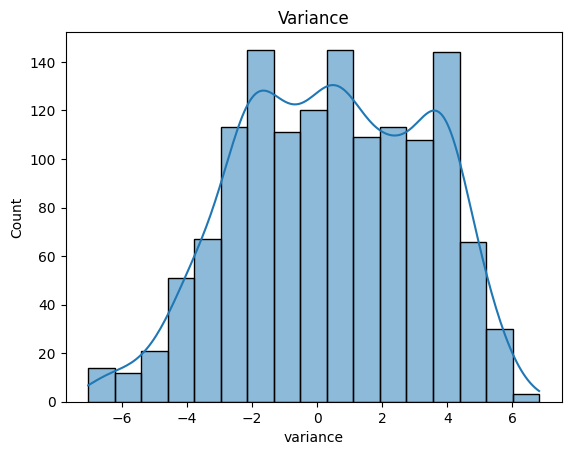

In [61]:
# Create a histogram of variance
sns.histplot(df['variance'], kde=True)
plt.title('Variance')
plt.show()

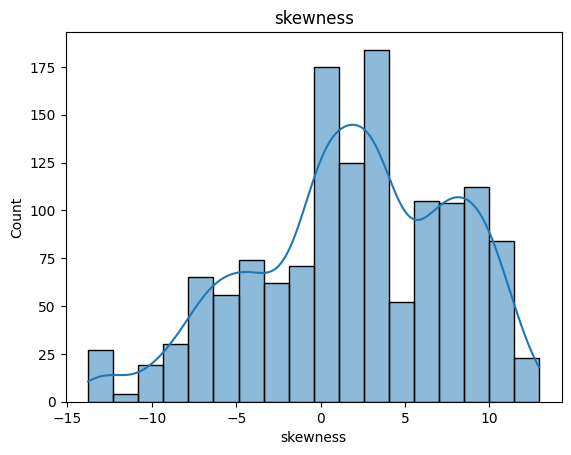

In [62]:
# Create a histogram of skewness
sns.histplot(df['skewness'], kde=True)
plt.title('skewness')
plt.show()

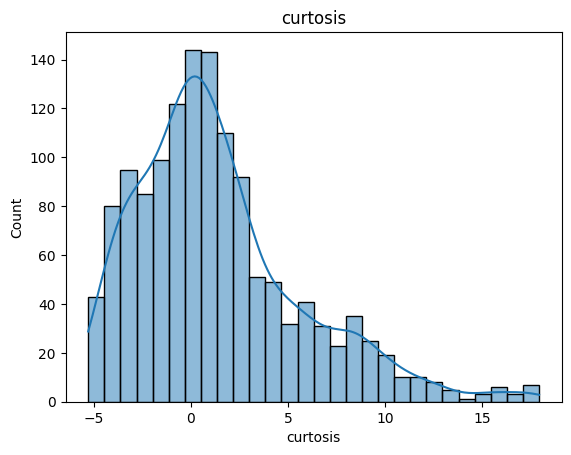

In [63]:
# Create a histogram of curtosis
sns.histplot(df['curtosis'], kde=True)
plt.title('curtosis')
plt.show()

## 2.2 Handle missing values and clean data
### There are no missing values here

## 2.3 Feature selection and Engineering

There was no need to combine existing features here. 

## Reflection 2

What patterns of anomalies do you see? I see strong correlation between skewness and variance and entropy and variance

Do any features stand out ? Skewness and variance stands out

What preprocessing steps were necessary to clean and improve data? None

Did you create or modify any features to improve performance? I did not create or modify any features to improve performance as it was not necessary. 



## Section 3 - Feature Selection and Justification

### 3.1  Choose features and target

### Case1: input features: 'Curtosis' and 'Variance' target: class
### Case2: input features: 'Skewness' and 'Variance' target: class
### Case3: input features: 'Entropy' and 'variance" target: class

## 3.2 Define X and y

### Assign input features to X
### Assign target variables to y

In [64]:
# Case 1: Features = Curtosis, Variance
# Select the features 'curtosis', 'variance' as input
X1 = df[['curtosis', 'variance']]
# Select 'survived' as the target for the same rows
y1 = df['class']
 

# Case 2: Features = Skewness, Variance
X2 = df[['skewness', 'variance']]
# Select the matching 'survived' values using the same index
y2 = df.loc[X2.index, 'class']
 

# Case 3: Features = Entropy, Variance)
X3 = df[['variance', 'entropy']]
# Select the corresponding 'survived' values for those rows
y3 = df.loc[X3.index, 'class']

## Reflection 3

#### Why did you choose those features? Selecting models with curtosis and variance, skewness and variance and entropy and variance, we should be able to predict whether the bank note is real or not. 

#### How might they impact predictions or accuracy? Once we input these factors in our models (Decision Tree and neural network), we will be able to tell which one is more accurate. 



## Section 4. Train a Classification Model (Decision Tree)

### 4.1 Split the Data into training and test sets

In [65]:
# Case 1: Features = Curtosis, Variance
splitter1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx1, test_idx1 in splitter1.split(X1, y1):

    X1_train = X1.iloc[train_idx1]
    X1_test  = X1.iloc[test_idx1]
    y1_train = y1.iloc[train_idx1]
    y1_test  = y1.iloc[test_idx1]

print('Case 1 - Curtosis + Variance:')
print('Train size:', len(X1_train), '| Test size:', len(X1_test))

Case 1 - Curtosis + Variance:
Train size: 1097 | Test size: 275


In [66]:
# Case 2: Features = Skewness, Variance
splitter2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx2, test_idx2 in splitter2.split(X2, y2):
    X2_train = X2.iloc[train_idx2]
    X2_test  = X2.iloc[test_idx2]
    y2_train = y2.iloc[train_idx2]
    y2_test  = y2.iloc[test_idx2]

print('Case 2 - Skewness + Variance:')
print('Train size:', len(X2_train), '| Test size:', len(X2_test))



Case 2 - Skewness + Variance:
Train size: 1097 | Test size: 275


In [67]:
# Case 3: Features = Entropy, Variance
splitter3 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)
for train_idx3, test_idx3 in splitter3.split(X3, y3):
    X3_train = X3.iloc[train_idx3]
    X3_test  = X3.iloc[test_idx3]
    y3_train = y3.iloc[train_idx3]
    y3_test  = y3.iloc[test_idx3]

print('Case 3 - entropy + Variance:')
print('Train size:', len(X3_train), '| Test size:', len(X3_test))

Case 3 - entropy + Variance:
Train size: 1097 | Test size: 275


### 4.2 Create and Train Decision Tree Model

In [ ]:

# CASE 1: Decision Tree using Curtosis, Variance
tree_model1 = DecisionTreeClassifier()
tree_model1.fit(X1_train, y1_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [69]:
# CASE 2: Decision Tree using Skewness, Variance
tree_model2 = DecisionTreeClassifier()
tree_model2.fit(X2_train, y2_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [70]:
# CASE 3: Decision Tree using Entropy, Variance
tree_model3 = DecisionTreeClassifier()
tree_model3.fit(X3_train, y3_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


### 4.3 Evaluate Model Performance

In [71]:
# Predict on training data
y1_pred = tree_model1.predict(X1_train)
print("Results for Decision Tree on training data (Case 1 - Curtosis, Variance):")
print(classification_report(y1_train, y1_pred, digits=4))

# Predict on test data
y1_test_pred = tree_model1.predict(X1_test)
print("Results for Decision Tree on test data (Case 1 - Curtosis, Variance):")
print(classification_report(y1_test, y1_test_pred, digits=4))

Results for Decision Tree on training data (Case 1 - Curtosis, Variance):
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       609
           1     1.0000    1.0000    1.0000       488

    accuracy                         1.0000      1097
   macro avg     1.0000    1.0000    1.0000      1097
weighted avg     1.0000    1.0000    1.0000      1097

Results for Decision Tree on test data (Case 1 - Curtosis, Variance):
              precision    recall  f1-score   support

           0     0.9119    0.9477    0.9295       153
           1     0.9310    0.8852    0.9076       122

    accuracy                         0.9200       275
   macro avg     0.9215    0.9165    0.9185       275
weighted avg     0.9204    0.9200    0.9198       275



In [90]:
# Predict on training data
y2_pred = tree_model2.predict(X2_train)
print("Results for Decision Tree on training data (Case 2 - skewness, variance):")
print(classification_report(y2_train, y2_pred, digits=4))

# Predict on test data
y2_test_pred = tree_model2.predict(X2_test)
print("Results for Decision Tree on test data (Case 2 - skewness, variance):")
print(classification_report(y2_test, y2_test_pred, digits=4))

Results for Decision Tree on training data (Case 2 - skewness, variance):
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       609
           1     1.0000    1.0000    1.0000       488

    accuracy                         1.0000      1097
   macro avg     1.0000    1.0000    1.0000      1097
weighted avg     1.0000    1.0000    1.0000      1097

Results for Decision Tree on test data (Case 2 - skewness, variance):
              precision    recall  f1-score   support

           0     0.9130    0.9608    0.9363       153
           1     0.9474    0.8852    0.9153       122

    accuracy                         0.9273       275
   macro avg     0.9302    0.9230    0.9258       275
weighted avg     0.9283    0.9273    0.9270       275



In [91]:
# Predict on training data
y3_pred = tree_model3.predict(X3_train)
print("Results for Decision Tree on training data (Case 3 - Entropy, 'Variance'):")
print(classification_report(y3_train, y3_pred, digits=4))

# Predict on test data
y3_test_pred = tree_model3.predict(X3_test)
print("Results for Decision Tree on test data (Case 3 - Entropy, 'Variance'):")
print(classification_report(y3_test, y3_test_pred, digits=4))

Results for Decision Tree on training data (Case 3 - Entropy, 'Variance'):
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       609
           1     1.0000    1.0000    1.0000       488

    accuracy                         1.0000      1097
   macro avg     1.0000    1.0000    1.0000      1097
weighted avg     1.0000    1.0000    1.0000      1097

Results for Decision Tree on test data (Case 3 - Entropy, 'Variance'):
              precision    recall  f1-score   support

           0     0.8874    0.8758    0.8816       153
           1     0.8468    0.8607    0.8537       122

    accuracy                         0.8691       275
   macro avg     0.8671    0.8682    0.8676       275
weighted avg     0.8694    0.8691    0.8692       275



## 4.4 Report Confusion Matrix (as a heatmap)

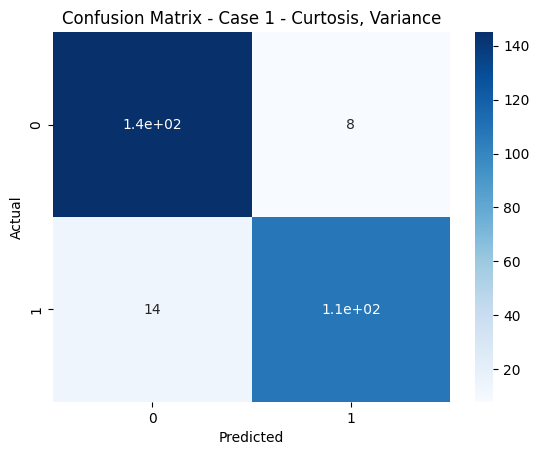

In [92]:
# Create confusion matrix for test predictions (Case 1)
cm1 = confusion_matrix(y1_test, y1_test_pred)

# Plot heatmap
sns.heatmap(cm1, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 1 - Curtosis, Variance')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

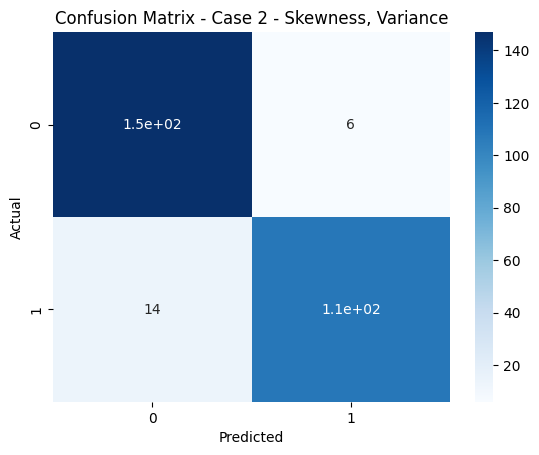

In [93]:
# Create confusion matrix for test predictions (Case 2)
cm2 = confusion_matrix(y2_test, y2_test_pred)

# Plot heatmap
sns.heatmap(cm2, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 2 - Skewness, Variance')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

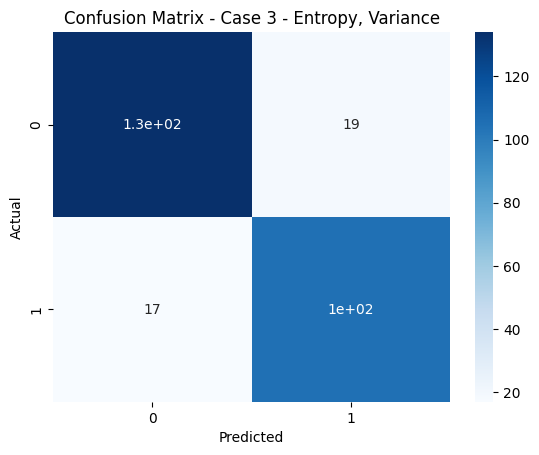

In [94]:
# Create confusion matrix for test predictions (Case 3)
cm3 = confusion_matrix(y3_test, y3_test_pred)

# Plot heatmap
sns.heatmap(cm3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Case 3 - Entropy, Variance')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 4.5 Report Decision Tree Plot

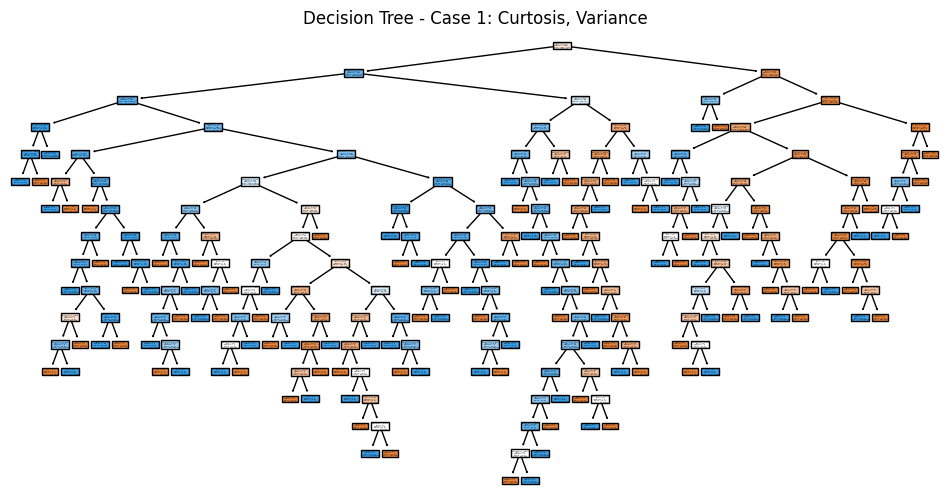

In [95]:
# Case 1

# Plot Decision Tree for Case 1
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model1,
          feature_names=X1.columns,
          class_names=['Genuine', 'Counterfeit'],
          filled=True)
plt.title("Decision Tree - Case 1: Curtosis, Variance")
plt.show()

# Save image
fig.savefig("tree_case1_Curtosis and variance.png")

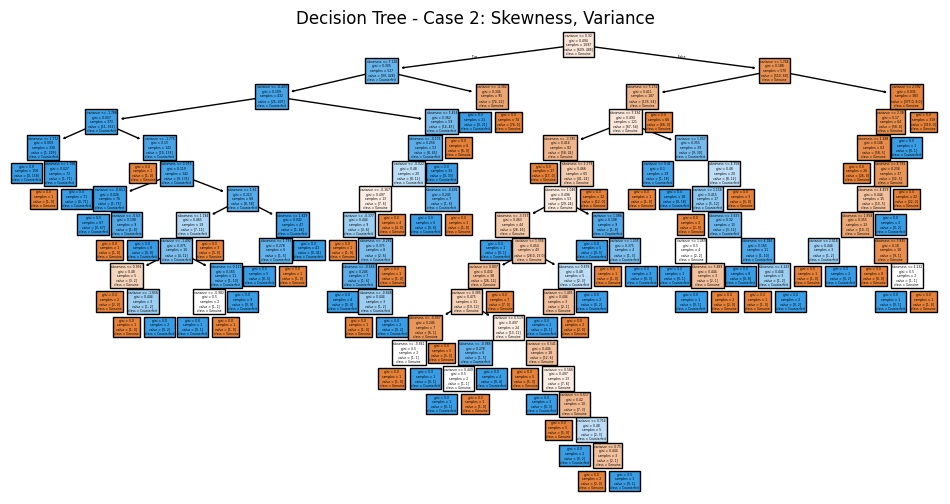

In [96]:
# Case 2

# Plot Decision Tree for Case 2
fig = plt.figure(figsize=(12, 6))
plot_tree(tree_model2,
          feature_names=X2.columns,
          class_names=['Genuine', 'Counterfeit'],
          filled=True)
plt.title("Decision Tree - Case 2: Skewness, Variance")
plt.show()

# Save image
fig.savefig("tree_case2_skewness and variance.png")

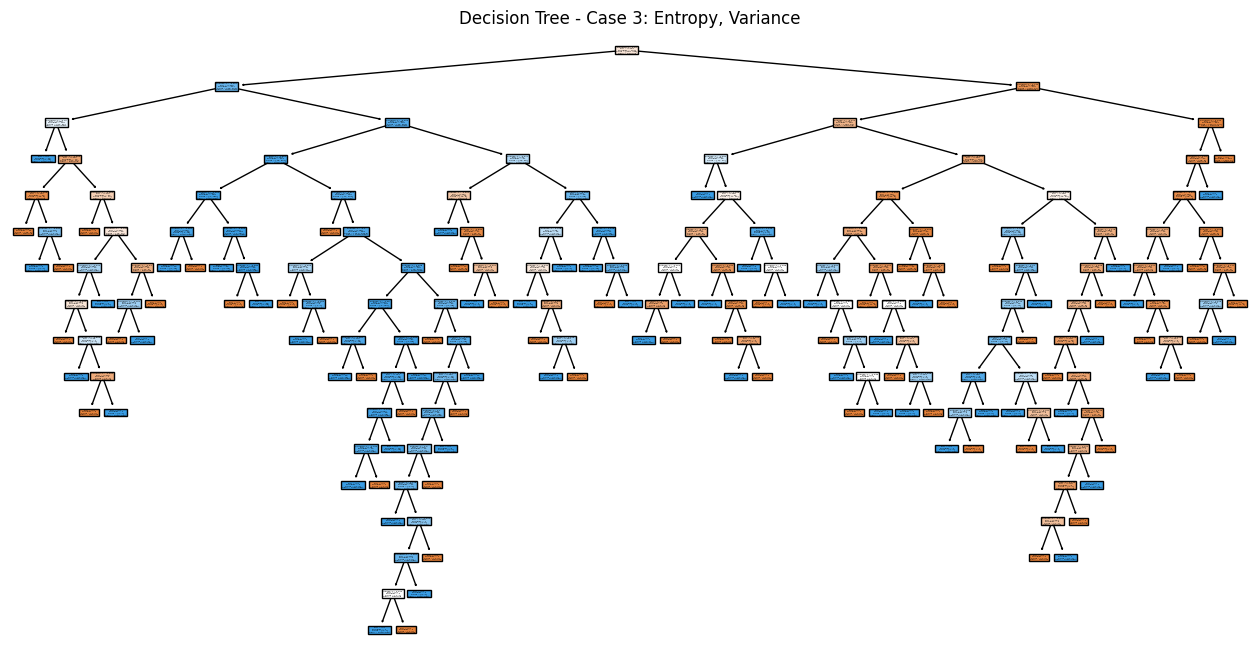

In [97]:
# Case 3

# Plot Decision Tree for Case 3
fig = plt.figure(figsize=(16, 8))
plot_tree(tree_model3,
          feature_names=X3.columns,
          class_names=['Genuine', 'Counterfeit'],
          filled=True)
plt.title("Decision Tree - Case 3: Entropy, Variance")
plt.show()

# Save image
fig.savefig("tree_case3_Entropy and Variance.png")

## Reflection 4:

### How well did the different cases perform? Overall, the accuracy and precision in all the three cases are encouraging (ranging from 80 to 90%)

### Are there any surprising results? Not surprising but interestingly the models with variance and skewness and variance and curtosis had higher precision and accuracy in the 90%  which was encouraging. 



## Section 5. Improve the Model or Try Alternates
### 5.1 Train and Evaluate Neural Network Model on Case 1

In [98]:
# Train NN for Case 1 (Curtosis, Variance)
nn_model1 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

nn_model1.fit(X1_train, y1_train)

/Users/maheshbashyal/Repos/ml-midterm-Bashyal/ml-midterm-Bashyal/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [99]:
# Predict on test data (Case 1)
y1_nn_pred = nn_model1.predict(X1_test)

# Print classification report
print("Results for Neural Network on test data (Case 1 - Curtosis, Variance):")
print(classification_report(y1_test, y1_nn_pred, digits=4))

Results for Neural Network on test data (Case 1 - Curtosis, Variance):
              precision    recall  f1-score   support

           0     0.8758    0.8758    0.8758       153
           1     0.8443    0.8443    0.8443       122

    accuracy                         0.8618       275
   macro avg     0.8600    0.8600    0.8600       275
weighted avg     0.8618    0.8618    0.8618       275



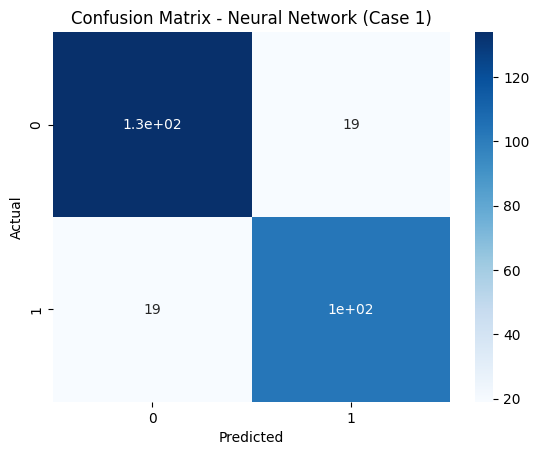

In [100]:
# Create confusion matrix
cm_nn1 = confusion_matrix(y1_test, y1_nn_pred)

# Plot heatmap
sns.heatmap(cm_nn1, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Neural Network (Case 1)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 5.2 Visualize Neural Network Model for Case 1

In [101]:
# Get the range of our two features - use padding to enhance appearance

padding = 1 
x_min, x_max = X1['curtosis'].min() - padding, X1['curtosis'].max() + padding
y_min, y_max = X1['variance'].min() - padding, X1['variance'].max() + padding
# Create a meshgrid (all combinations of curtosis and variance)

# A grid of values covering the entire input space
# np.linspace(start, stop, num) generates evenly spaced values (like a ruler)
# Here, we create 500 points between min and max for each axis
# np.meshgrid creates a coordinate grid from the two arrays

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                                    np.linspace(y_min, y_max, 500))
# Flatten the grid arrays and prepare them for prediction
# np.c_ stacks the flattened xx and yy into coordinate pairs
# .ravel() flattens a 2D array into 1D (required by the model for prediction)

Z = nn_model1.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted results to match the original 2D grid shape
Z = Z.reshape(xx.shape)

/Users/maheshbashyal/Repos/ml-midterm-Bashyal/ml-midterm-Bashyal/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


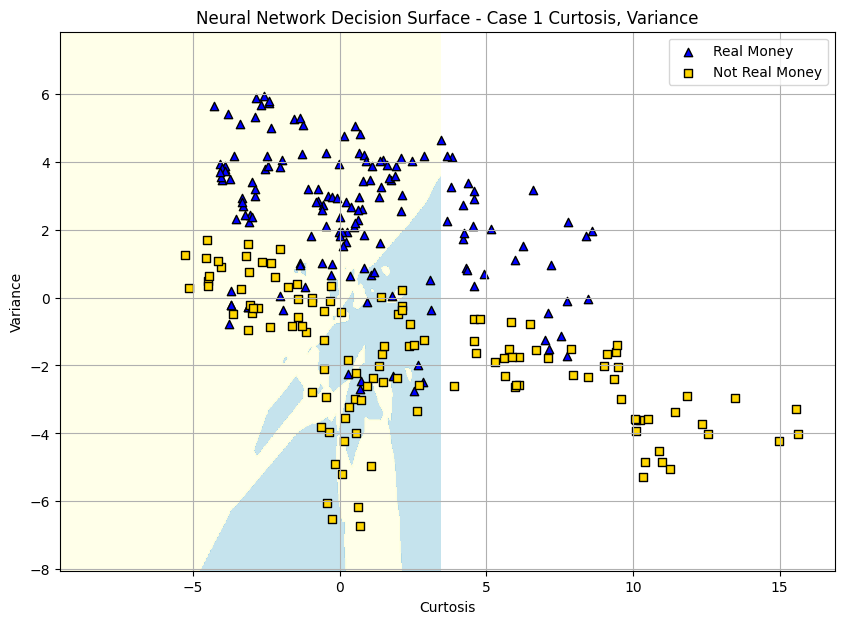

In [119]:
# Plot the decision surface (background) showing predicted survival zones

 # Blue for 0, yellow for 1 - change this up as you like
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(['lightblue', 'lightyellow'])

plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)# Overlay the actual test data points for visual comparison


# Plot real money (0) as blue triangles
plt.scatter(X1_test['curtosis'][y1_test == 0],
            X1_test['variance'][y1_test == 0],
            c='blue', marker='^', edgecolor='k', label='Real Money')
 
# Plot not real money (1) as gold squares
plt.scatter(X1_test['curtosis'][y1_test == 1],
            X1_test['variance'][y1_test == 1],
            c='gold', marker='s', edgecolor='k', label='Not Real Money')

# Add axis labels, title, legend, and grid
plt.xlabel('Curtosis')
plt.ylabel('Variance')
plt.title('Neural Network Decision Surface - Case 1 Curtosis, Variance')
plt.legend()
plt.grid(True)
plt.show()

## 5.3 Train and Evaluate Model (Neural Network on Case 2)

In [120]:
# Train NN for Case 2 (Skewness and Variance)
nn_model2 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

nn_model2.fit(X2_train, y2_train)

,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [121]:
# Predict on test data (Case 2)
y2_nn_pred = nn_model2.predict(X2_test)

# Print classification report
print("Results for Neural Network on test data (Case 2 - Skewness, Variance):")
print(classification_report(y2_test, y2_nn_pred, digits=4))

Results for Neural Network on test data (Case 2 - Skewness, Variance):
              precision    recall  f1-score   support

           0     0.9474    0.9412    0.9443       153
           1     0.9268    0.9344    0.9306       122

    accuracy                         0.9382       275
   macro avg     0.9371    0.9378    0.9374       275
weighted avg     0.9383    0.9382    0.9382       275



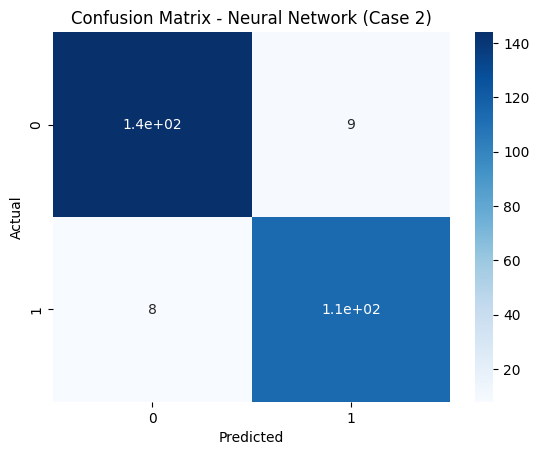

In [122]:
# Create confusion matrix
cm_nn2 = confusion_matrix(y2_test, y2_nn_pred)

# Plot heatmap
sns.heatmap(cm_nn2, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Neural Network (Case 2)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 5.4 Visualize Neural network on Case 2

In [123]:
# Get the range of our two features - use padding to enhance appearance

padding = 1 
x_min, x_max = X2['skewness'].min() - padding, X2['skewness'].max() + padding
y_min, y_max = X2['variance'].min() - padding, X2['variance'].max() + padding
# Create a meshgrid (all combinations of curtosis and variance)

# A grid of values covering the entire input space
# np.linspace(start, stop, num) generates evenly spaced values (like a ruler)
# Here, we create 500 points between min and max for each axis
# np.meshgrid creates a coordinate grid from the two arrays

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                                    np.linspace(y_min, y_max, 500))
# Flatten the grid arrays and prepare them for prediction
# np.c_ stacks the flattened xx and yy into coordinate pairs
# .ravel() flattens a 2D array into 1D (required by the model for prediction)

Z = nn_model2.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted results to match the original 2D grid shape
Z = Z.reshape(xx.shape)

/Users/maheshbashyal/Repos/ml-midterm-Bashyal/ml-midterm-Bashyal/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


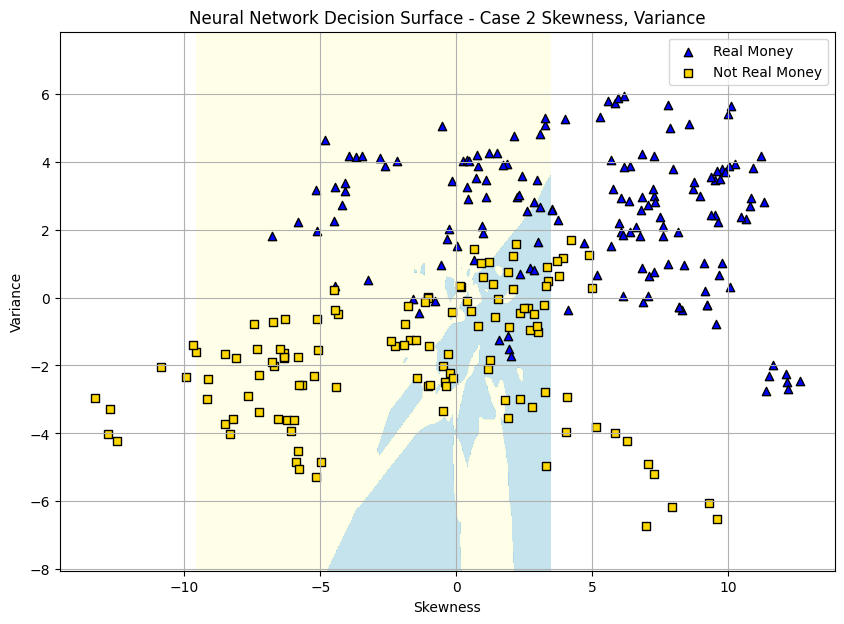

In [131]:
# Plot the decision surface (background) showing predicted survival zones

 # Blue for 0, yellow for 1 - change this up as you like
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(['lightblue', 'lightyellow'])

plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)# Overlay the actual test data points for visual comparison


# Plot real money (0) as blue triangles
plt.scatter(X2_test['skewness'][y2_test == 0],
            X2_test['variance'][y2_test == 0],
            c='blue', marker='^', edgecolor='k', label='Real Money')
 
# Plot not real money (1) as gold squares
plt.scatter(X2_test['skewness'][y2_test == 1],
            X2_test['variance'][y2_test == 1],
            c='gold', marker='s', edgecolor='k', label='Not Real Money')

# Add axis labels, title, legend, and grid
plt.xlabel('Skewness')
plt.ylabel('Variance')
plt.title('Neural Network Decision Surface - Case 2 Skewness, Variance')
plt.legend()
plt.grid(True)
plt.show()

## 5.5 Train and Evaluate Model (Neural Network on Case 3)

In [132]:
# Train NN for Case 3 (Entropy, 'Variance')
nn_model3 = MLPClassifier(
    hidden_layer_sizes=(50, 25, 10),
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)

nn_model3.fit(X3_train, y3_train)

/Users/maheshbashyal/Repos/ml-midterm-Bashyal/ml-midterm-Bashyal/.venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:602: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


,hidden_layer_sizes,"(50, ...)"
,activation,'relu'
,solver,'lbfgs'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


In [133]:
# Predict on test data (Case 3)
y3_nn_pred = nn_model3.predict(X3_test)

# Print classification report
print("Results for Neural Network on test data (Case 3 - entropy, 'variance'):")
print(classification_report(y3_test, y3_nn_pred, digits=4))

Results for Neural Network on test data (Case 3 - entropy, 'variance'):
              precision    recall  f1-score   support

           0     0.9091    0.9150    0.9121       153
           1     0.8926    0.8852    0.8889       122

    accuracy                         0.9018       275
   macro avg     0.9008    0.9001    0.9005       275
weighted avg     0.9018    0.9018    0.9018       275



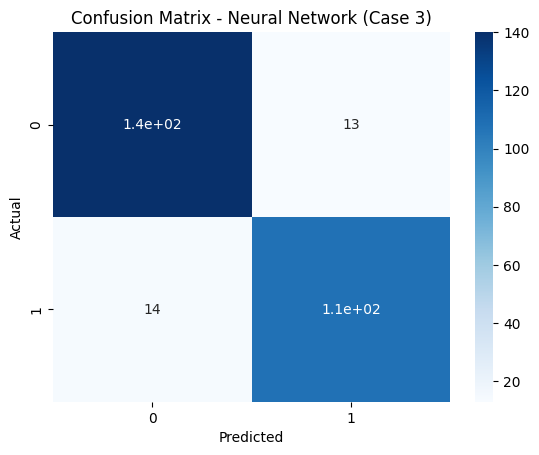

In [134]:
# Create confusion matrix
cm_nn3 = confusion_matrix(y3_test, y3_nn_pred)

# Plot heatmap
sns.heatmap(cm_nn3, annot=True, cmap='Blues')
plt.title('Confusion Matrix - Neural Network (Case 3)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 5.6 Visualize Neural Network on Case 3

In [135]:
# Get the range of our two features - use padding to enhance appearance

padding = 1 
x_min, x_max = X3['entropy'].min() - padding, X3['entropy'].max() + padding
y_min, y_max = X3['variance'].min() - padding, X3['variance'].max() + padding
# Create a meshgrid (all combinations of curtosis and variance)

# A grid of values covering the entire input space
# np.linspace(start, stop, num) generates evenly spaced values (like a ruler)
# Here, we create 500 points between min and max for each axis
# np.meshgrid creates a coordinate grid from the two arrays

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                                    np.linspace(y_min, y_max, 500))
# Flatten the grid arrays and prepare them for prediction
# np.c_ stacks the flattened xx and yy into coordinate pairs
# .ravel() flattens a 2D array into 1D (required by the model for prediction)

Z = nn_model3.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predicted results to match the original 2D grid shape
Z = Z.reshape(xx.shape)

/Users/maheshbashyal/Repos/ml-midterm-Bashyal/ml-midterm-Bashyal/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


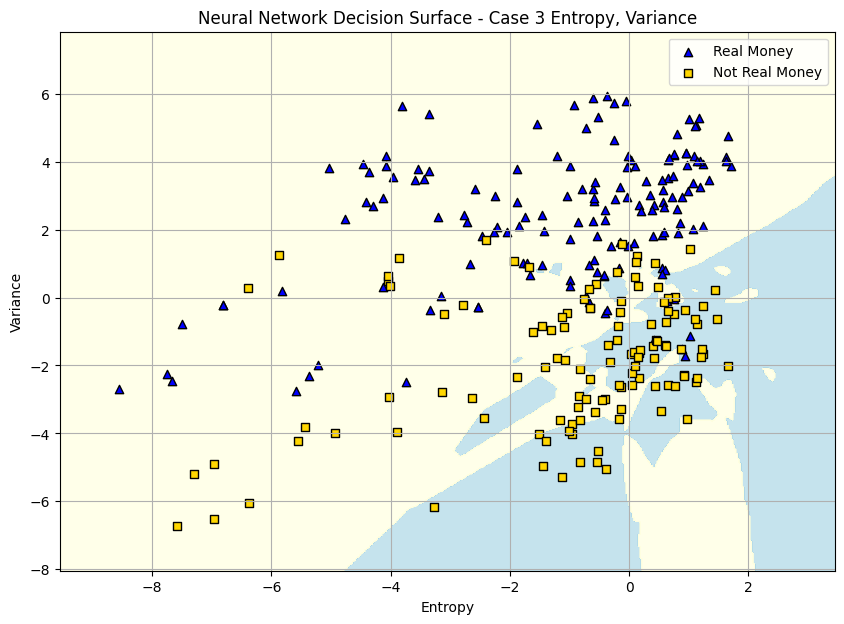

In [138]:
# Plot the decision surface (background) showing predicted survival zones

 # Blue for 0, yellow for 1 - change this up as you like
plt.figure(figsize=(10, 7))
cmap_background = ListedColormap(['lightblue', 'lightyellow'])

plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.7)# Overlay the actual test data points for visual comparison


# Plot real money (0) as blue triangles
plt.scatter(X3_test['entropy'][y3_test == 0],
            X3_test['variance'][y3_test == 0],
            c='blue', marker='^', edgecolor='k', label='Real Money')
 
# Plot not real money (1) as gold squares
plt.scatter(X3_test['entropy'][y3_test == 1],
            X3_test['variance'][y3_test == 1],
            c='gold', marker='s', edgecolor='k', label='Not Real Money')

# Add axis labels, title, legend, and grid
plt.xlabel('Entropy')
plt.ylabel('Variance')
plt.title('Neural Network Decision Surface - Case 3 Entropy, Variance')
plt.legend()
plt.grid(True)
plt.show()

## Reflection 5: 

#### Which model performed better? The Neural Network performed better than the decision tree model. 

#### Why might one classifier be more effective in this specific case? The effectiveness of one model over the other could depend on whether the relationship between features and class is simple or complex. If the relationship is simple then decision tree is effective, if the relationship is complex then neural network is better. 

### Comparing the Models

In [139]:
from sklearn.metrics import classification_report, accuracy_score

def get_metrics(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    acc = accuracy_score(y_true, y_pred)
    prec = report['1']['precision']
    rec = report['1']['recall']
    f1 = report['1']['f1-score']
    return acc, prec, rec, f1

# Summarize key models/cases
results = [
    ("Decision Tree", "Case 1", "Curtosis and Variance", *get_metrics(y1_test, y1_test_pred)),
    ("Decision Tree", "Case 2", "Skewness and Variance", *get_metrics(y2_test, y2_test_pred)),
    ("Decision Tree", "Case 3", "Entropy and Variance", *get_metrics(y3_test, y3_test_pred)),
    ("Neural Network (MLP)", "Case 1", "Curtosis and Variance", *get_metrics(y1_test, y1_nn_pred)),
    ("Neural Network (MLP)", "Case 2", "Skewness and Variance", *get_metrics(y2_test, y2_nn_pred)),
    ("Neural Network (MLP)", "Case 3", "Entropy and Variance", *get_metrics(y3_test, y3_nn_pred))
]

# Build Markdown table text dynamically
header = "| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |\n"
header += "|-------------|------|---------------|-----------|------------|---------|-----------|-------|"

rows = []
for model, case, feats, acc, p, r, f1 in results:
    rows.append(f"| {model} | {case} | {feats} | {acc*100:.2f}% | {p*100:.2f}% | {r*100:.2f}% | {f1*100:.2f}% | - |")

# Print Markdown-formatted table block
# Print Markdown-formatted table block
print(header + "\n" + "\n".join(rows))



| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|-------------|------|---------------|-----------|------------|---------|-----------|-------|
| Decision Tree | Case 1 | Curtosis and Variance | 92.00% | 93.10% | 88.52% | 90.76% | - |
| Decision Tree | Case 2 | Skewness and Variance | 92.73% | 94.74% | 88.52% | 91.53% | - |
| Decision Tree | Case 3 | Entropy and Variance | 86.91% | 84.68% | 86.07% | 85.37% | - |
| Neural Network (MLP) | Case 1 | Curtosis and Variance | 86.18% | 84.43% | 84.43% | 84.43% | - |
| Neural Network (MLP) | Case 2 | Skewness and Variance | 93.82% | 92.68% | 93.44% | 93.06% | - |
| Neural Network (MLP) | Case 3 | Entropy and Variance | 90.18% | 89.26% | 88.52% | 88.89% | - |


## Section 6. Final Thoughts and Insights

#### Overall, based on these analyses, Skewness and variance seems to be the best predictors of finding out whether the bank note is genuine or counterfeit. In case of decision tree, the accuracy and precision of the model was 92.74% and 94.74%, respectively, with a F1 score of 91.53%. When we used the Neural Network method, the accuracy and precision of the model was 93.82% and 92.68%, respectively with a F1 score of 93.06%. Moreover, when we compare the two models (Decision Tree vs Neural Network), Neural network seems to a better model in predicting genuine bank notes from counterfeit ones. 